# Text Mining

## Load necessary packages

In [48]:
from pathlib import Path
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
from unidecode import unidecode
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import KFold
import string
import collections as ct
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt

## Load corpora

In [2]:
def load_corpus(filename):
    corpus = Path(filename).read_text(encoding="utf8")
    return corpus

In [3]:
def load_corpora(filelist,author):
    files = []
    for file in filelist:
        location = "Corpora/train/"+file
        corpus = load_corpus(location)
        files.append(corpus)
    df = pd.DataFrame(files, columns=['Text'])
    df['Author'] = pd.Series([author for x in range(len(df.index))], index=df.index)
    return df

In [4]:
almada = [
    'AlmadaNegreiros/pg22615.txt',
    'AlmadaNegreiros/pg22730.txt',
    'AlmadaNegreiros/pg22801.txt',
    'AlmadaNegreiros/pg22802.txt',
    'AlmadaNegreiros/pg22969.txt',
    'AlmadaNegreiros/pg23133.txt',
    'AlmadaNegreiros/pg23620.txt',
    'AlmadaNegreiros/pg23879.txt',
    'AlmadaNegreiros/pg23961.txt'
]

In [5]:
corpora_almada = load_corpora(almada, 'Almada Negreiros')
corpora_almada.shape

(9, 2)

In [6]:
camilo = [
    'CamiloCasteloBranco/24691-0.txt',
    'CamiloCasteloBranco/34756-0.txt',
    'CamiloCasteloBranco/pg16425.txt',
    'CamiloCasteloBranco/pg17927.txt',
    'CamiloCasteloBranco/pg19375.txt',
    'CamiloCasteloBranco/pg21406.txt',
    'CamiloCasteloBranco/pg23203.txt',
    'CamiloCasteloBranco/pg23345.txt',
    'CamiloCasteloBranco/pg23346.txt',
    'CamiloCasteloBranco/pg24339.txt',
    'CamiloCasteloBranco/pg25844.txt',
    'CamiloCasteloBranco/pg26017.txt',
    'CamiloCasteloBranco/pg26103.txt',
    'CamiloCasteloBranco/pg26110.txt',
    'CamiloCasteloBranco/pg26988.txt',
    'CamiloCasteloBranco/pg27364.txt',
    'CamiloCasteloBranco/pg27541.txt',
    'CamiloCasteloBranco/pg28310.txt',
    'CamiloCasteloBranco/pg31694.txt',
    'CamiloCasteloBranco/pg33788.txt',
]

corpora_camilo = load_corpora(camilo, 'Camilo Castelo Branco')
corpora_camilo.shape

(20, 2)

In [7]:
eca = [
    'EcaDeQueiros/pg18220.txt',
    'EcaDeQueiros/pg25641.txt',
    'EcaDeQueiros/pg27637.txt',
    'EcaDeQueiros/pg31347.txt',
    'EcaDeQueiros/pg40409.txt'
]

corpora_eca = load_corpora(eca, 'Eca de Queiros')
corpora_eca.shape

(5, 2)

In [8]:
rodrigues_santos = [
    'JoseRodriguesSantos/A Filha Do Capitao - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Formula De Deus - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Mao do Diabo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Vida Num Sopro - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/Furia Divina - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Anjo Branco - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Setimo Selo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O ultimo Segredo - Jose Rodrigues dos Santos.txt'
]

corpora_rodrigues_santos = load_corpora(rodrigues_santos, 'Jose Rodrigues dos Santos')
corpora_rodrigues_santos.shape

(8, 2)

In [9]:
saramago = [
    'JoseSaramago/A Caverna - Jose Saramago.txt',
    'JoseSaramago/As Intermitencias da Morte - Jose Saramago.txt',
    'JoseSaramago/Caim - Jose Saramago.txt',
    'JoseSaramago/Claraboia - Jose Saramago.txt',
    'JoseSaramago/Ensaio Sobre a Cegueira - Jose Saramago.txt',
    'JoseSaramago/Historia Do Cerco De Lisboa - Jose Saramago.txt',
    'JoseSaramago/Memorial Do Convento - Jose Saramago.txt',
    'JoseSaramago/O Ano Da Morte De Ricardo Reis - Jose Saramago.txt',
    'JoseSaramago/O Conto Da Ilha Desconhecida - Jose Saramago.txt',
    'JoseSaramago/O Homem Duplicado - Jose Saramago.txt',
    'JoseSaramago/Terra Do Pecado - Jose Saramago.txt',
    'JoseSaramago/Viagem Do Elefante - Jose Saramago.txt'
]

corpora_saramago = load_corpora(saramago, 'Jose Saramago')
corpora_saramago.shape

(12, 2)

In [10]:
luisa = [
    'LuisaMarquesSilva/ABelaHistoria.txt',
    'LuisaMarquesSilva/acabouSe.txt',
    'LuisaMarquesSilva/Botão.txt',
    'LuisaMarquesSilva/controlz.txt',
    'LuisaMarquesSilva/emedo.txt',
    'LuisaMarquesSilva/Lisboa2050.txt',
    'LuisaMarquesSilva/passeioInferno.txt',
    'LuisaMarquesSilva/rapsodiasemdo.txt',
    'LuisaMarquesSilva/UltimaHistoria.txt'
]

corpora_luisa = load_corpora(luisa, 'Luisa Marques Silva')
corpora_luisa.shape

(9, 2)

In [11]:
corpora = pd.concat([corpora_almada, corpora_camilo, corpora_eca, corpora_rodrigues_santos, corpora_saramago, corpora_luisa]).reset_index(drop = True)
corpora.shape

(63, 2)

## Cross validation sets

In [12]:
kf = KFold(n_splits=5) #chose 5 because this means that the train-test split is approximately 80%-20%
train_test_splits = []

for train_index, test_index in kf.split(corpora):
    #print("TRAIN:", train_index, "TEST:", test_index)
    train_test_splits.append((train_index,test_index))
    
train_test_splits

[(array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
         30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
         47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 26, 27, 28, 29,
         30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
         47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
  array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 39, 40, 41, 42, 43, 44, 45, 46,
         47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
  array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38])),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25,

In [13]:
corpora_train_1 = corpora.iloc[train_test_splits[0][0]].reset_index().drop('index',1)
corpora_test_1 = corpora.iloc[train_test_splits[0][1]].reset_index().drop('index',1)

corpora_train_2 = corpora.iloc[train_test_splits[1][0]].reset_index().drop('index',1)
corpora_test_2 = corpora.iloc[train_test_splits[1][1]].reset_index().drop('index',1)

corpora_train_3 = corpora.iloc[train_test_splits[2][0]].reset_index().drop('index',1)
corpora_test_3 = corpora.iloc[train_test_splits[2][1]].reset_index().drop('index',1)

corpora_train_4 = corpora.iloc[train_test_splits[3][0]].reset_index().drop('index',1)
corpora_test_4 = corpora.iloc[train_test_splits[3][1]].reset_index().drop('index',1)

corpora_train_5 = corpora.iloc[train_test_splits[4][0]].reset_index().drop('index',1)
corpora_test_5 = corpora.iloc[train_test_splits[4][1]].reset_index().drop('index',1)

corpora_train_1

,Text,Author
0,\n\nA SENHORA RATTAZZI\n\nPOR\n\nCAMILLO CASTE...,Camilo Castelo Branco
1,\nOBRAS DE CAMILLO CASTELLO BRANCO\n\n_Novella...,Camilo Castelo Branco
2,SCENAS CONTEMPORANEAS\n\nPOR\n\nCAMILLO CASTEL...,Camilo Castelo Branco
3,A GRATIDÃO.\n\nROMANCE.\n\n\nI.\n\nEstavamos n...,Camilo Castelo Branco
4,O ARREPENDIMENTO.\n\nROMANCE\n\n\nEm tempos da...,Camilo Castelo Branco
5,SUICIDA\n\n\nPORTO Typographia de A. J. da Sil...,Camilo Castelo Branco
6,VOLTAREIS Ó CHRISTO?\n\n\n\n\nPorto Imprensa P...,Camilo Castelo Branco
7,\nROMANCES NACIONAES\n\n\nO REGICIDA\n\nRomanc...,Camilo Castelo Branco
8,ANNOS DE PROSA\n\nRomance\n\npor\n\nCAMILLO CA...,Camilo Castelo Branco
9,OBRAS\n\nDE\n\nCAMILLO CASTELLO BRANCO\n\nEDIÇ...,Camilo Castelo Branco


## Preprocessing

In [14]:
def preprocessing(dataframe):
    processed_corpus = []
    
    stop_words_pt = set(stopwords.words("portuguese", "english"))
    
    for i in tqdm(range(len(dataframe))):
        text = dataframe['Text'][i]
        
        #Remove accents
        text = unidecode(text)
        
        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        # Convert to list from string
        text = text.split()

        #Lemmatisation
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stop_words_pt]
        text = " ".join(text)
        
        processed_corpus.append(text)
    return processed_corpus

In [15]:
cleaned_corpora_1 = preprocessing(corpora_train_1)
cleaned_corpora_2 = preprocessing(corpora_train_2)
cleaned_corpora_3 = preprocessing(corpora_train_3)
cleaned_corpora_4 = preprocessing(corpora_train_4)
cleaned_corpora_5 = preprocessing(corpora_train_5)

In [16]:
corpora_train_1['Clean Text'] = pd.Series(cleaned_corpora_1, index = corpora_train_1.index)
corpora_train_2['Clean Text'] = pd.Series(cleaned_corpora_2, index = corpora_train_2.index)
corpora_train_3['Clean Text'] = pd.Series(cleaned_corpora_3, index = corpora_train_3.index)
corpora_train_4['Clean Text'] = pd.Series(cleaned_corpora_4, index = corpora_train_4.index)
corpora_train_5['Clean Text'] = pd.Series(cleaned_corpora_5, index = corpora_train_5.index)
corpora_train_1

,Text,Author,Clean Text
0,\n\nA SENHORA RATTAZZI\n\nPOR\n\nCAMILLO CASTE...,Camilo Castelo Branco,senhora rattazzi camillo castello branco nova ...
1,\nOBRAS DE CAMILLO CASTELLO BRANCO\n\n_Novella...,Camilo Castelo Branco,obras camillo castello branco _novellas minho_...
2,SCENAS CONTEMPORANEAS\n\nPOR\n\nCAMILLO CASTEL...,Camilo Castelo Branco,scenas contemporaneas camillo castello-branco....
3,A GRATIDÃO.\n\nROMANCE.\n\n\nI.\n\nEstavamos n...,Camilo Castelo Branco,gratidao. romance. i. estavamos ultimos dia de...
4,O ARREPENDIMENTO.\n\nROMANCE\n\n\nEm tempos da...,Camilo Castelo Branco,arrependimento. romance tempo mocidade costuma...
5,SUICIDA\n\n\nPORTO Typographia de A. J. da Sil...,Camilo Castelo Branco,suicida porto typographia a. j. silva teixeira...
6,VOLTAREIS Ó CHRISTO?\n\n\n\n\nPorto Imprensa P...,Camilo Castelo Branco,voltareis christo? porto imprensa portugueza b...
7,\nROMANCES NACIONAES\n\n\nO REGICIDA\n\nRomanc...,Camilo Castelo Branco,romance nacionaes regicida romance historico c...
8,ANNOS DE PROSA\n\nRomance\n\npor\n\nCAMILLO CA...,Camilo Castelo Branco,annos prosa romance camillo castello-branco gr...
9,OBRAS\n\nDE\n\nCAMILLO CASTELLO BRANCO\n\nEDIÇ...,Camilo Castelo Branco,obras camillo castello branco edicao popular x...


In [17]:
def punctuation(corpora):
    count = lambda l1,l2: sum([1 for x in l1 if x in l2])

    corpora['count_punct'] = corpora['Clean Text'].apply(lambda s: count(s, string.punctuation))

    accumulate = lambda l1,l2: [x for x in l1 if x in l2]

    corpora['acc_punct_list'] = corpora['Clean Text'].apply(lambda s: accumulate(s, string.punctuation))
    
    corpora['acc_punct_dict'] = corpora['acc_punct_list'].apply(lambda s: {k:v for k, v in ct.Counter(s).items() if k in string.punctuation})
    
    df_punct = corpora['acc_punct_dict'].apply(pd.Series)
    
    corpora = pd.concat([corpora, df_punct], axis = 1)
    corpora = corpora.fillna(0)
    
    corpora = corpora.drop(['acc_punct_list', 'acc_punct_dict'], axis = 1)
    
    return corpora

In [18]:
corpora_train_1 = punctuation(corpora_train_1)
corpora_train_2 = punctuation(corpora_train_2)
corpora_train_3 = punctuation(corpora_train_3)
corpora_train_4 = punctuation(corpora_train_4)
corpora_train_5 = punctuation(corpora_train_5)
corpora_train_1

,Text,Author,Clean Text,count_punct,",",-,.,^,:,_,...,&,\,/,|,=,+,#,~,"""",@
0,\n\nA SENHORA RATTAZZI\n\nPOR\n\nCAMILLO CASTE...,Camilo Castelo Branco,senhora rattazzi camillo castello branco nova ...,1667,489.0,171.0,371.0,36.0,26.0,366.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,\nOBRAS DE CAMILLO CASTELLO BRANCO\n\n_Novella...,Camilo Castelo Branco,obras camillo castello branco _novellas minho_...,11199,3488.0,2697.0,2983.0,58.0,216.0,370.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SCENAS CONTEMPORANEAS\n\nPOR\n\nCAMILLO CASTEL...,Camilo Castelo Branco,scenas contemporaneas camillo castello-branco....,18334,3673.0,3413.0,7895.0,116.0,131.0,700.0,...,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A GRATIDÃO.\n\nROMANCE.\n\n\nI.\n\nEstavamos n...,Camilo Castelo Branco,gratidao. romance. i. estavamos ultimos dia de...,3935,1536.0,1003.0,969.0,35.0,22.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,O ARREPENDIMENTO.\n\nROMANCE\n\n\nEm tempos da...,Camilo Castelo Branco,arrependimento. romance tempo mocidade costuma...,856,435.0,154.0,135.0,0.0,9.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,SUICIDA\n\n\nPORTO Typographia de A. J. da Sil...,Camilo Castelo Branco,suicida porto typographia a. j. silva teixeira...,1071,368.0,105.0,269.0,6.0,20.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,VOLTAREIS Ó CHRISTO?\n\n\n\n\nPorto Imprensa P...,Camilo Castelo Branco,voltareis christo? porto imprensa portugueza b...,251,64.0,57.0,77.0,0.0,11.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,\nROMANCES NACIONAES\n\n\nO REGICIDA\n\nRomanc...,Camilo Castelo Branco,romance nacionaes regicida romance historico c...,13486,4205.0,3354.0,3642.0,0.0,233.0,466.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ANNOS DE PROSA\n\nRomance\n\npor\n\nCAMILLO CA...,Camilo Castelo Branco,annos prosa romance camillo castello-branco gr...,16679,5933.0,4021.0,4229.0,0.0,248.0,182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,OBRAS\n\nDE\n\nCAMILLO CASTELLO BRANCO\n\nEDIÇ...,Camilo Castelo Branco,obras camillo castello branco edicao popular x...,10166,3314.0,2370.0,2603.0,0.0,188.0,236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
def remove_punctuation(dataframe):
    processed_corpus = []
    
    for i in tqdm(range(len(dataframe))):
        text = dataframe['Clean Text'][i]
        
        #remove punctuation
        text = re.sub('[^a-zA-Z]', ' ', text)
        
        processed_corpus.append(text)
        
    return processed_corpus

In [20]:
cleaned_corpora_1 = remove_punctuation(corpora_train_1)
cleaned_corpora_2 = remove_punctuation(corpora_train_2)
cleaned_corpora_3 = remove_punctuation(corpora_train_3)
cleaned_corpora_4 = remove_punctuation(corpora_train_4)
cleaned_corpora_5 = remove_punctuation(corpora_train_5)

In [21]:
corpora_train_1['Clean Text'] = pd.Series(cleaned_corpora_1, index = corpora_train_1.index)
corpora_train_2['Clean Text'] = pd.Series(cleaned_corpora_2, index = corpora_train_2.index)
corpora_train_3['Clean Text'] = pd.Series(cleaned_corpora_3, index = corpora_train_3.index)
corpora_train_4['Clean Text'] = pd.Series(cleaned_corpora_4, index = corpora_train_4.index)
corpora_train_5['Clean Text'] = pd.Series(cleaned_corpora_5, index = corpora_train_5.index)
corpora_train_1

,Text,Author,Clean Text,count_punct,",",-,.,^,:,_,...,&,\,/,|,=,+,#,~,"""",@
0,\n\nA SENHORA RATTAZZI\n\nPOR\n\nCAMILLO CASTE...,Camilo Castelo Branco,senhora rattazzi camillo castello branco nova ...,1667,489.0,171.0,371.0,36.0,26.0,366.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,\nOBRAS DE CAMILLO CASTELLO BRANCO\n\n_Novella...,Camilo Castelo Branco,obras camillo castello branco novellas minho ...,11199,3488.0,2697.0,2983.0,58.0,216.0,370.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SCENAS CONTEMPORANEAS\n\nPOR\n\nCAMILLO CASTEL...,Camilo Castelo Branco,scenas contemporaneas camillo castello branco ...,18334,3673.0,3413.0,7895.0,116.0,131.0,700.0,...,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A GRATIDÃO.\n\nROMANCE.\n\n\nI.\n\nEstavamos n...,Camilo Castelo Branco,gratidao romance i estavamos ultimos dia de...,3935,1536.0,1003.0,969.0,35.0,22.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,O ARREPENDIMENTO.\n\nROMANCE\n\n\nEm tempos da...,Camilo Castelo Branco,arrependimento romance tempo mocidade costuma...,856,435.0,154.0,135.0,0.0,9.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,SUICIDA\n\n\nPORTO Typographia de A. J. da Sil...,Camilo Castelo Branco,suicida porto typographia a j silva teixeira...,1071,368.0,105.0,269.0,6.0,20.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,VOLTAREIS Ó CHRISTO?\n\n\n\n\nPorto Imprensa P...,Camilo Castelo Branco,voltareis christo porto imprensa portugueza b...,251,64.0,57.0,77.0,0.0,11.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,\nROMANCES NACIONAES\n\n\nO REGICIDA\n\nRomanc...,Camilo Castelo Branco,romance nacionaes regicida romance historico c...,13486,4205.0,3354.0,3642.0,0.0,233.0,466.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ANNOS DE PROSA\n\nRomance\n\npor\n\nCAMILLO CA...,Camilo Castelo Branco,annos prosa romance camillo castello branco gr...,16679,5933.0,4021.0,4229.0,0.0,248.0,182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,OBRAS\n\nDE\n\nCAMILLO CASTELLO BRANCO\n\nEDIÇ...,Camilo Castelo Branco,obras camillo castello branco edicao popular x...,10166,3314.0,2370.0,2603.0,0.0,188.0,236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def word_count(corpora):
    word_count = corpora['Clean Text'].apply(lambda x: len(str(x).split(" ")))
    word_count_2 = corpora['Text'].apply(lambda x: len(str(x).split(" ")))
    corpora['word_count_text'] = word_count_2
    corpora['word_count_clean'] = word_count
    
    return corpora

In [23]:
corpora_train_1 = word_count(corpora_train_1)
corpora_train_2 = word_count(corpora_train_2)
corpora_train_3 = word_count(corpora_train_3)
corpora_train_4 = word_count(corpora_train_4)
corpora_train_5 = word_count(corpora_train_5)

In [24]:
corpora_train_1

,Text,Author,Clean Text,count_punct,",",-,.,^,:,_,...,/,|,=,+,#,~,"""",@,word_count_text,word_count_clean
0,\n\nA SENHORA RATTAZZI\n\nPOR\n\nCAMILLO CASTE...,Camilo Castelo Branco,senhora rattazzi camillo castello branco nova ...,1667,489.0,171.0,371.0,36.0,26.0,366.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6158,5355
1,\nOBRAS DE CAMILLO CASTELLO BRANCO\n\n_Novella...,Camilo Castelo Branco,obras camillo castello branco novellas minho ...,11199,3488.0,2697.0,2983.0,58.0,216.0,370.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45098,36187
2,SCENAS CONTEMPORANEAS\n\nPOR\n\nCAMILLO CASTEL...,Camilo Castelo Branco,scenas contemporaneas camillo castello branco ...,18334,3673.0,3413.0,7895.0,116.0,131.0,700.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48570,44000
3,A GRATIDÃO.\n\nROMANCE.\n\n\nI.\n\nEstavamos n...,Camilo Castelo Branco,gratidao romance i estavamos ultimos dia de...,3935,1536.0,1003.0,969.0,35.0,22.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13684,11867
4,O ARREPENDIMENTO.\n\nROMANCE\n\n\nEm tempos da...,Camilo Castelo Branco,arrependimento romance tempo mocidade costuma...,856,435.0,154.0,135.0,0.0,9.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3945,3117
5,SUICIDA\n\n\nPORTO Typographia de A. J. da Sil...,Camilo Castelo Branco,suicida porto typographia a j silva teixeira...,1071,368.0,105.0,269.0,6.0,20.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5254,3825
6,VOLTAREIS Ó CHRISTO?\n\n\n\n\nPorto Imprensa P...,Camilo Castelo Branco,voltareis christo porto imprensa portugueza b...,251,64.0,57.0,77.0,0.0,11.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4865,809
7,\nROMANCES NACIONAES\n\n\nO REGICIDA\n\nRomanc...,Camilo Castelo Branco,romance nacionaes regicida romance historico c...,13486,4205.0,3354.0,3642.0,0.0,233.0,466.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51027,43087
8,ANNOS DE PROSA\n\nRomance\n\npor\n\nCAMILLO CA...,Camilo Castelo Branco,annos prosa romance camillo castello branco gr...,16679,5933.0,4021.0,4229.0,0.0,248.0,182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62702,52111
9,OBRAS\n\nDE\n\nCAMILLO CASTELLO BRANCO\n\nEDIÇ...,Camilo Castelo Branco,obras camillo castello branco edicao popular x...,10166,3314.0,2370.0,2603.0,0.0,188.0,236.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44966,33896


In [25]:
corpora_train_1.groupby(['Author']).sum()

,count_punct,",",-,.,^,:,_,;,',!,...,/,|,=,+,#,~,"""",@,word_count_text,word_count_clean
Author,,,,,,,,,,,,,,,,,,,,,
Camilo Castelo Branco,148919,46434.0,33148.0,43845.0,252.0,2223.0,3533.0,3043.0,5754.0,4358.0,...,2.0,22.0,2.0,12.0,4.0,0.0,0.0,0.0,590238,451800
Eca de Queiros,130931,52322.0,18975.0,31519.0,372.0,3159.0,5767.0,2121.0,6219.0,5323.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,438367,395819
Jose Rodrigues dos Santos,262657,71790.0,23129.0,74452.0,35.0,937.0,1.0,1742.0,1124.0,5357.0,...,78.0,16.0,7.0,16.0,12.0,1.0,68216.0,3.0,1131971,872310
Jose Saramago,195897,135421.0,26067.0,29335.0,1.0,1520.0,9.0,109.0,88.0,1392.0,...,32.0,3.0,0.0,5.0,0.0,2.0,115.0,4.0,1006571,789784
Luisa Marques Silva,8905,2982.0,863.0,3238.0,0.0,557.0,0.0,52.0,8.0,219.0,...,88.0,0.0,0.0,0.0,2.0,0.0,207.0,7.0,41214,34883


##  Data exploration

In [26]:
corpora_train_1.word_count_clean.describe()

count        50.000000
mean      50891.920000
std       44429.795424
min         809.000000
25%        6191.500000
50%       42517.000000
75%       82523.750000
max      198525.000000
Name: word_count_clean, dtype: float64

In [30]:
all_words_1 = ' '.join(corpora_train_1['Clean Text']).split()
all_words_2 = ' '.join(corpora_train_2['Clean Text']).split()
all_words_3 = ' '.join(corpora_train_3['Clean Text']).split()
all_words_4 = ' '.join(corpora_train_4['Clean Text']).split()
all_words_5 = ' '.join(corpora_train_5['Clean Text']).split()

In [31]:
# Count all words
freq_1 = pd.Series(all_words_1).value_counts()
freq_2 = pd.Series(all_words_2).value_counts()
freq_3 = pd.Series(all_words_3).value_counts()
freq_4 = pd.Series(all_words_4).value_counts()
freq_5 = pd.Series(all_words_5).value_counts()

In [32]:
freq_1[:25]

nao       44972
se        25280
e         10032
d          9573
ja         8673
lhe        7794
o          7339
disse      6308
ser        6111
la         5834
ainda      5817
a          5543
que        5355
me         5348
bem        4928
ha         4921
onde       4831
so         4754
ate        4517
sobre      4449
assim      4322
agora      4245
mao        4188
porque     4175
dia        4175
dtype: int64

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mafalda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
# remove accents from stopwords
stopwords = set(stopwords.words("portuguese"))
stop_words = []
for word in stopwords:
    word = unidecode(word)
    stop_words.append(word)

In [40]:
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop_words, 
    max_features=10000, 
    ngram_range=(1,3) # all inclusive from {1,2,3}, if only bigrams use (2,2)
)

In [42]:
X_1 = cv.fit_transform(corpora_train_1["Clean Text"])
X_2 = cv.fit_transform(corpora_train_2["Clean Text"])
X_3 = cv.fit_transform(corpora_train_3["Clean Text"])
X_4 = cv.fit_transform(corpora_train_4["Clean Text"])
X_5 = cv.fit_transform(corpora_train_5["Clean Text"])

In [43]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [46]:
top_df_1 = get_top_n_grams(corpora_train_1["Clean Text"], top_k=20, n=1)
top_df_2 = get_top_n_grams(corpora_train_2["Clean Text"], top_k=20, n=1)
top_df_3 = get_top_n_grams(corpora_train_3["Clean Text"], top_k=20, n=1)
top_df_4 = get_top_n_grams(corpora_train_4["Clean Text"], top_k=20, n=1)
top_df_5 = get_top_n_grams(corpora_train_5["Clean Text"], top_k=20, n=1)

In [47]:
top_df_1.head(10)

,Ngram,Freq
0,nao,44972
1,se,25280
2,ja,8673
3,lhe,7794
4,disse,6308
5,ser,6111
6,la,5834
7,ainda,5817
8,que,5355
9,me,5348


In [49]:
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

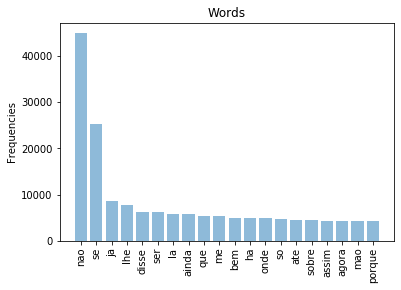

In [50]:
plot_frequencies(top_df_1)